In [1]:
# Source: https://github.com/ishaberry/Covid19Canada
# Source: https://resources-covid19canada.hub.arcgis.com/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Covid Confirmed Cases
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
file = '04-11-2020.csv'
df = pd.read_csv(url+file)

# Summary by province
df_prov = pd.read_csv('data/canada/Cases (Province).csv')
df_prov

# Testing Numbers
path = 'data/Covid19Canada/'
df_testing = pd.read_csv(path + 'testing_cumulative.csv')
#Formating Dates, Sorting Values and Selecting Fields
df_testing['date_testing'] = pd.to_datetime(df_testing['date_testing'], format = "%d-%m-%Y")
df_testing.sort_values(['province','date_testing'], ascending=True, inplace = True)
df_testing.reset_index(inplace=True)
df_testing = df_testing[['date_testing', 'province', 'cumulative_testing']]

In [2]:
can = df[df['Country_Region'] == 'Canada'].sort_values('Confirmed', ascending=False)
can[['Province_State', 'Confirmed']][:-2]

,Province_State,Confirmed
2757,Quebec,12292
2753,Ontario,6648
2695,Alberta,1567
2703,British Columbia,1445
2752,Nova Scotia,428
2764,Saskatchewan,289
2740,Manitoba,243
2747,Newfoundland and Labrador,241
2744,New Brunswick,112
2754,Prince Edward Island,25


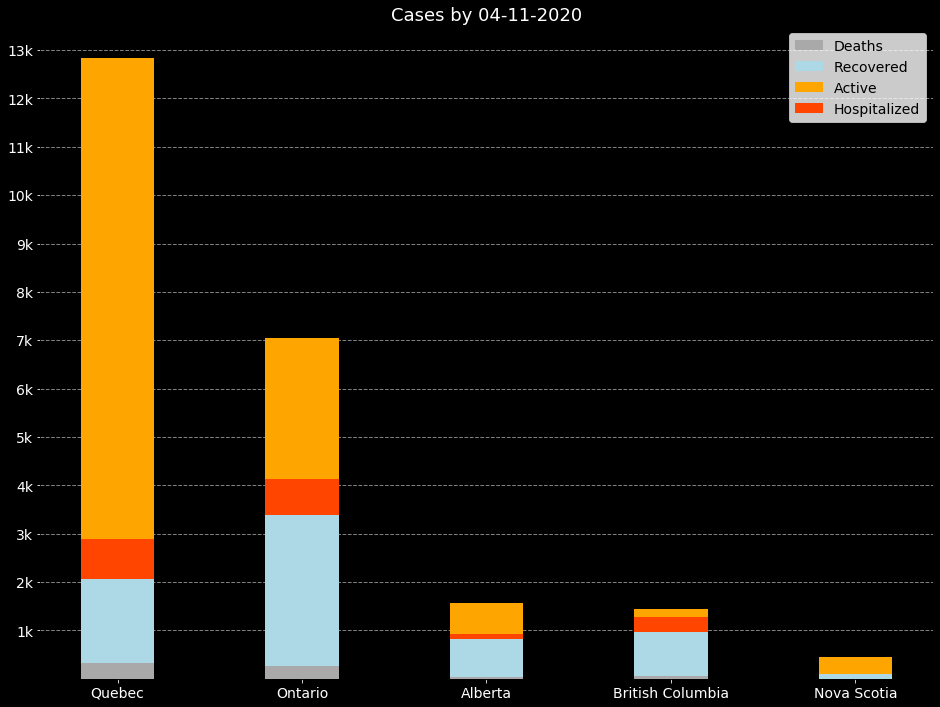

In [13]:
#provinces = ['British Columbia', 'Alberta', 'Quebec', 'Ontario', 'Nova Scotia']
provinces = ['Quebec', 'Ontario', 'British Columbia', 
             'Alberta', 'Nova Scotia']
fig, ax = plt.subplots(1, figsize=(16,12), facecolor='black')

#can = df[df['Country_Region'] == 'Canada'].sort_values('Confirmed', ascending=False)
#can = can[can['Province_State'].isin(provinces)]

can = df_prov[df_prov['NAME'].isin(provinces)].sort_values('Cases', ascending=False)

#plot
plt.bar(x=can['NAME'], height=can['Deaths'], 
        width=0.4, color='darkgrey')

plt.bar(x=can['NAME'], height=can['Recovered'], 
        width=0.4, color='lightblue', 
        bottom = can['Deaths'])

plt.bar(x=can['NAME'], height=can['Active Cases'], 
        width=0.4, color='orange',
        bottom = can['Deaths'] + can['Recovered'])

plt.bar(x=can['NAME'], height=can['Hospitalized'], 
        width=0.4, color='orangered', bottom = can['Deaths'] + can['Recovered'])



#details
plt.xticks(fontsize=14)
yticks = np.arange(1000,13001,1000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]
plt.yticks(yticks, labels = yticks_label, fontsize=14)
plt.legend(['Deaths', 'Recovered', 'Active', 'Hospitalized'], fontsize = 14)
plt.title('Cases by ' + file[:10], color='white', fontsize=18)

# grid
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Colors
ax.set_facecolor('xkcd:black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

plt.savefig('img/overview_canada.png', facecolor='black', edgecolor='none')

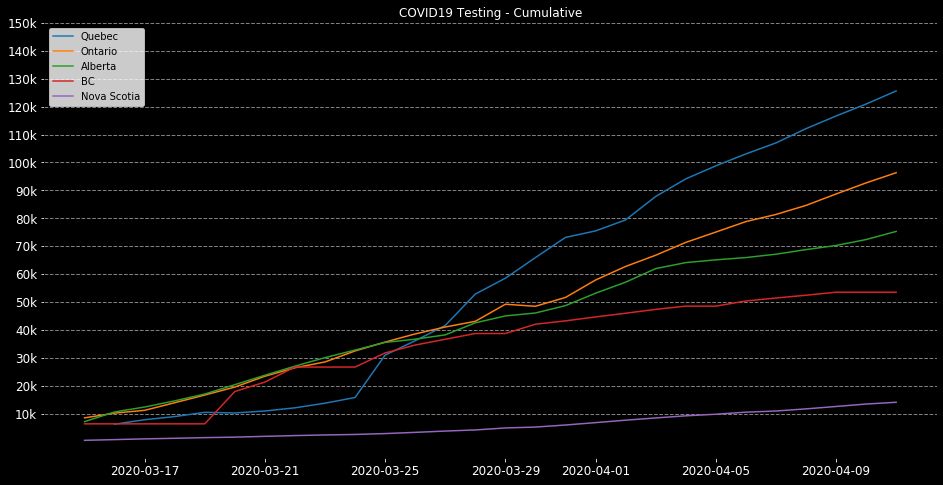

In [12]:
provinces = ['Quebec', 'Ontario', 'Alberta', 'BC', 'Nova Scotia']

fig, ax = plt.subplots(1, figsize=(16,8), facecolor = 'black')

# plots
for province in provinces:
    temp = df_testing[df_testing.province == province]
    plt.plot(temp['date_testing'], temp['cumulative_testing'])

#Details
plt.xticks(fontsize=12)
yticks = np.arange(10000, 130001, 10000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]
plt.yticks(yticks, fontsize = 12, labels = yticks_label)
plt.legend(provinces)
plt.title('COVID19 Testing - Cumulative', color='white')

# grid
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Colors
ax.set_facecolor('xkcd:black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

plt.savefig('img/testing_canada.png', facecolor='black', edgecolor='none')

In [11]:
df_prov.head()

,OBJECTID,NAME,NOM,Province,Cases,Recovered,Deaths,Tests,Hospitalized,ICU,...,2019 Total Pop 70 to 74 Yrs,2019 Total Pop 75 to 79 Yrs,2019 Total Pop 80 to 84 Yrs,2019 Total Pop 85 or Older,2019 Total Pop Average Age,2019 Total Pop Median Age,2019 Total Pop Aggregate Age,Source URL,x,y
0,9,Alberta,Alberta,AB,1569.0,774.0,40.0,75278.0,105.0,33.0,...,148958.0,96811.0,65169.0,68156.0,38.3,37.3,169893805.0,https://www.alberta.ca/covid-19-alberta-data.aspx,NaN,NaN
1,6,British Columbia,Colombie-Britannique,BC,1445.0,905.0,58.0,53505.0,317.0,67.0,...,242964.0,167928.0,113708.0,119821.0,42.5,42.3,208070312.1,http://www.bccdc.ca/health-info/diseases-condi...,NaN,NaN
2,10,Manitoba,Manitoba,MB,242.0,96.0,4.0,17221.0,8.0,4.0,...,55244.0,37256.0,25796.0,28828.0,39.0,37.6,53412420.3,https://www.gov.mb.ca/covid19/index.html,NaN,NaN
3,5,New Brunswick,Nouveau-Brunswick,NB,114.0,70.0,0.0,7963.0,7.0,3.0,...,43432.0,28743.0,18645.0,19192.0,44.0,45.8,33284564.2,https://www2.gnb.ca/content/gnb/en/departments...,NaN,NaN
4,4,Newfoundland and Labrador,Terre-Neuve,NL,242.0,129.0,3.0,4812.0,7.0,NaN,...,30791.0,19393.0,12232.0,9959.0,44.1,46.1,23065436.3,https://covid-19-newfoundland-and-labrador-gnl...,NaN,NaN
